<a href="https://colab.research.google.com/github/beneDesp/GLDM3002/blob/lab2/mattWalsh_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Cereals-1.csv to Cereals-1.csv


In [4]:
import pandas as pd
#/content/Cereals.csv
cereals_df = pd.read_csv('/content/Cereals-1.csv')
cereals_df.shape

(77, 16)

# Regression

**Use Python** to load your dataset ("Cereals.csv") from your Canvas Data folder, to predict model form the data
as follows:

<br>
<br>

**(100%) Regression**

<br>

Predict Multiple Regression Model for target or response variable (**`rating`**) vs. input or independent variables
(**`calories, protein, fat, sodium, and fiber`**)

In [5]:
cereals_df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [8]:
predictors = ["calories", "protein", "fat", "sodium", "fiber"]
outcome = ["rating"]

cereal_data = cereals_df[predictors + outcome].copy()
print("Before NA drop:", cereal_data.shape)
cereal_data = cereal_data.dropna()
print('After NA drop:', cereal_data.shape)

cereal_data.head()

Before NA drop: (77, 6)
After NA drop: (77, 6)


,calories,protein,fat,sodium,fiber,rating
0,70,4,1,130,10.0,68.402973
1,120,3,5,15,2.0,33.983679
2,70,4,1,260,9.0,59.425505
3,50,4,0,140,14.0,93.704912
4,110,2,2,200,1.0,34.384843


In [11]:
# Train the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

pred = cereal_data.drop('rating', axis=1)
outcome = cereal_data['rating']

print(pred.shape)
#print(outcome.shape)

lr_model = LinearRegression()
lr_model.fit(pred, outcome)

print(lr_model.intercept_)
print(lr_model.coef_)

(77, 5)
67.95902813596052
[-0.28882407  5.13159384 -4.16558286 -0.04065492  1.49916444]


In [12]:
# sklearn metrics indicate our predictor variables can account for much of the variablility in price (approx 89%).  To answer the question in this task we
# use statsmodels

import statsmodels.api as sm

# For Fun, Let's Use sm to get
# an alternative Ordinary Least Squares (OLS) Linear Regression model summary
X2 = sm.add_constant(pred)
est = sm.OLS(outcome, X2)
est2 = est.fit()
print(est2.summary())
print("*"*10)
print(est2.summary2())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     70.57
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           3.64e-26
Time:                        18:35:08   Log-Likelihood:                -243.43
No. Observations:                  77   AIC:                             498.9
Df Residuals:                      71   BIC:                             512.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.9590      4.652     14.607      0.0

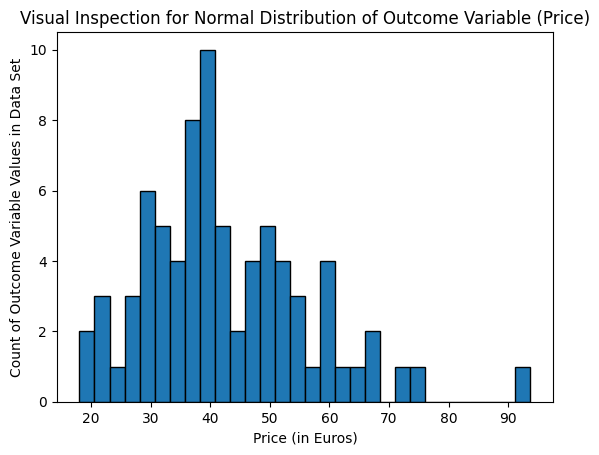

None


In [15]:
#see distribution of outcome varible to determine if Linear Regression assumtions of normality are reasonable

import matplotlib.pyplot as plt

#create histogram to visualize values in dataset
plt.xlabel("Price (in Euros)")
plt.ylabel("Count of Outcome Variable Values in Data Set")
plt.title('Visual Inspection for Normal Distribution of Outcome Variable (Price)')
plt.hist(outcome, edgecolor='black', bins=30)

#fig = sm.qqplot(corrola_enc['Price'], line='45')
print(plt.show())

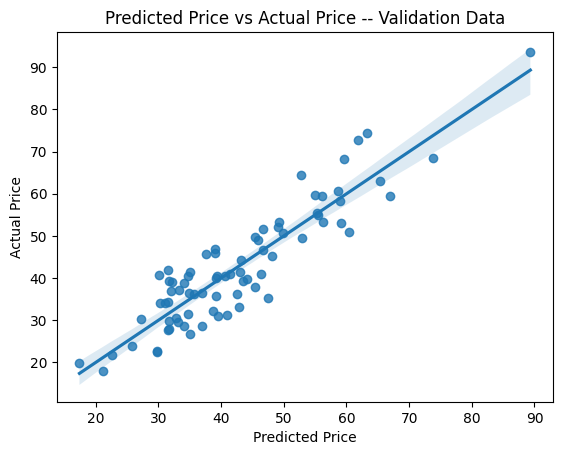

In [16]:
# Also inspect visualization of model predicted price v actual for test data

import seaborn as sns

#pred = cereal_data.drop('rating', axis=1)
#outcome = cereal_data['rating']

y_pred = lr_model.predict(pred)
sns.regplot(x=y_pred, y=outcome)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Predicted Price vs Actual Price -- Validation Data")
plt.show()

# Summary Statistics

In [ ]:
#type(cereals_df.describe())
#cereals_df.describe()
cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups', 'rating']
print(cereals_df[cols].describe().loc[['mean','50%','min','max','std']])

# Plot Histogram

In [ ]:
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups', 'rating']
scaled_cereals_df= pd.DataFrame(sc.fit_transform(cereals_df[cols]), columns=cols)

print(scaled_cereals_df.hist(figsize=(15, 10)))

## <u> Additional tests for subquestions below: </u>

In [ ]:
#print(type(scaled_cereals_df))
#print(type(cereals_df))
print("Describe scaled variables output:")
print(scaled_cereals_df.describe()) #.loc[['mean','50%','min','max','std']])

def find_iqr(x):
  return np.subtract(*np.nanpercentile(x, [75, 25]))
print("IQR output:")
print(scaled_cereals_df.apply(find_iqr))
print("Skew output:")
print(scaled_cereals_df.skew(axis=0))

## <u> Subquestions </u>

**a)** ***Varables with largest variablilty:***


1.   calories (fat tails, despite strong central tendency)
2.   per Interquartile range (IQR) of scaled variables, fat and sugars are the variables with the largest variablility

**b.)** ***Seemingly-skewed variables:*** fiber, potassium, vitamins rate high on a measure of skewedness

**c.)** ***Seemingly-extreme variables:*** potassium and fat have the seemingly most extreme outlier values as indicated by the range of their x-axis in the plot of histograms where all variables are scaled

# Use Boxplot

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.boxplot(x="shelf", y="rating",
data=cereals_df, palette="Set3")

# Correlation

## <u> Subquestions </u>

**a)** ***Correlation table:***

In [ ]:
cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups', 'rating']
cereals_df[cols].corr()

**b.)** ***Discuss***

The pair of vairiables most strongly correlated are potassium and fiber  and they are positively correlated.

In [ ]:
import matplotlib.pyplot as plt

matrix = cereals_df[cols].corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

NameError: name 'cereals_df' is not defined